In [1]:
import torch
import torch.autograd as autograd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
from FCN import FCN


In [3]:
from tools import *

In [4]:
%matplotlib inline

In [5]:
def partial_diff_equation(f, g):
    f_x_y = autograd.grad(f,g,torch.ones([g.shape[0], 1]), retain_graph=True, create_graph=True)[0] #first derivative
    f_xx_yy = autograd.grad(f_x_y,g,torch.ones(g.shape), create_graph=True)[0]#second derivative

    f_yy = f_xx_yy[:,[1]] # we select the 2nd element for y (the first one is x) (Remember the input X=[x,y]) 
    f_xx = f_xx_yy[:,[0]] # we select the 1st element for x (the second one is y) (Remember the input X=[x,y])

    u = f_xx + f_yy # loss equation
    u = u.float()

    return u

## Simplest Case

In [26]:
X, Y, T = generate_domain()
X_train, T_train, X_test, X_train_Nu, T_train_Nu = generate_BC(X, Y, T, squareHasHole = False)
X_train_PDE = generate_PDE(squareHasHole = False)

x = X[:,0]
y = Y[0,:]

In [27]:
PINN = FCN(layers, X_train_PDE, X_train, T_train, X_test, partial_diff_equation)
PINN.load_state_dict(torch.load('./PINN_simple.pt'))

<All keys matched successfully>

In [28]:
u_pred = PINN.forward(X_test)
u_pred = np.transpose(np.reshape(u_pred.detach().numpy(), (200, 200)))

<AxesSubplot: >

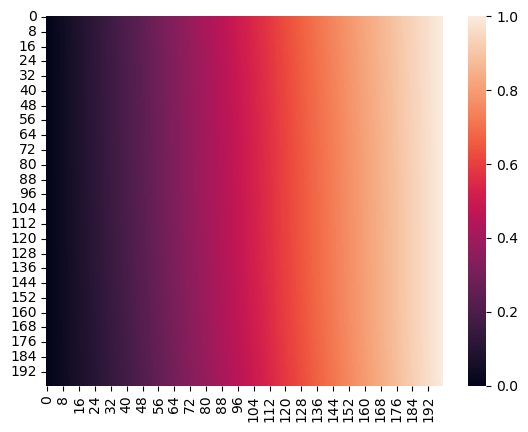

In [29]:
sns.heatmap(u_pred)

<AxesSubplot: >

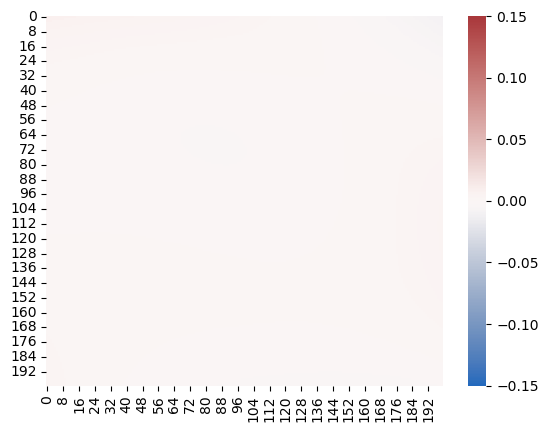

In [30]:
lossTensor = PINN.lossTensor(X_test)

lossTensor = np.reshape(lossTensor.detach().numpy(), (200,200))

sns.heatmap(lossTensor,
            vmin = -.15,
            vmax = .15,
            cmap = "vlag")

## Square With Hole

In [33]:
layers = np.array([2,48,48,48,48,48,48,48,48,1]) #8 hidden layers

In [34]:
X, Y, T = generate_domain()
X_train, T_train, X_test, X_train_Nu, T_train_Nu = generate_BC(X, Y, T, squareHasHole = True)
X_train_PDE = generate_PDE(squareHasHole = True)

x = X[:,0]
y = Y[0,:]

In [35]:
PINN = FCN(layers, X_train_PDE, X_train, T_train, X_test, partial_diff_equation)
PINN.load_state_dict(torch.load('./PINN_holed.pt'))

<All keys matched successfully>

In [36]:
u_pred = PINN.forward(X_test)
u_pred = np.transpose(np.reshape(u_pred.detach().numpy(), (200, 200)))

In [37]:
u_pred.shape

(200, 200)

In [38]:
mask = isNotInCircleTensorOrder2(u_pred, x, y)

<AxesSubplot: >

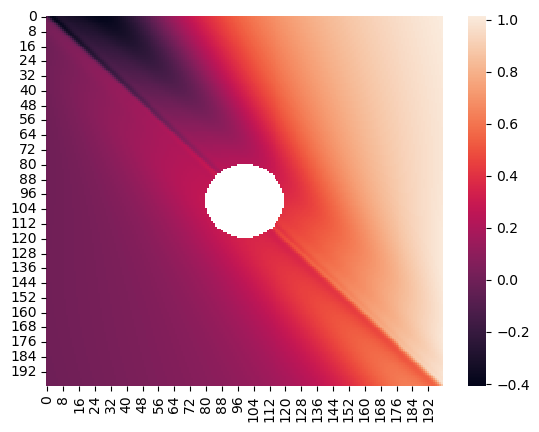

In [39]:
sns.heatmap(u_pred, mask = (1 - mask))

In [40]:
lossTensor = PINN.lossTensor(X_test)

In [41]:
lossTensor.shape

torch.Size([40000, 1])

In [42]:
lossTensor_2 = np.reshape(lossTensor.detach().numpy(), (200,200))

<AxesSubplot: >

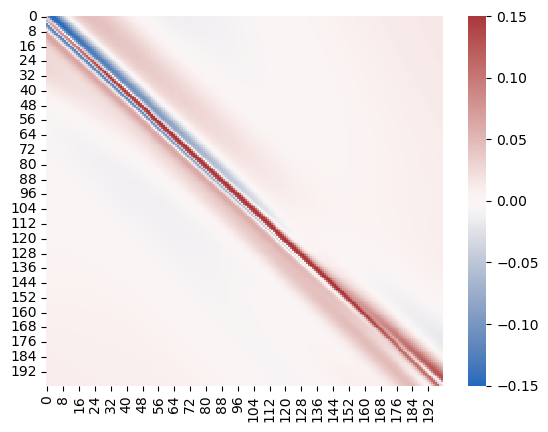

In [43]:
lossTensor = PINN.lossTensor(X_test)

lossTensor_2 = np.reshape(lossTensor.detach().numpy(), (200,200))

sns.heatmap(lossTensor_2,
            vmin = -.15,
            vmax = .15,
            cmap = "vlag")